In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in csv for crime data
filepathway = "01_Outputs/suburbCrimeDataClean.csv"

In [3]:
#Create dataframe for crime data
crime_DF_final = pd.read_csv(filepathway)
crime_DF_final

,lga_name,postcode,suburb,crime_id,crime_name,average_incident
0,Banyule,3079,ivanhoe,A20,Assault and related offences,43.600000
1,Banyule,3079,ivanhoe,A50,Robbery,3.000000
2,Banyule,3079,ivanhoe,A70,"Stalking, harassment and threatening behaviour",8.100000
3,Banyule,3079,ivanhoe,A80,Dangerous and negligent acts endangering people,3.333333
4,Banyule,3079,ivanhoe,B10,Arson,3.400000
...,...,...,...,...,...,...
7512,Yarra Ranges,3796,mount evelyn,D30,Public nuisance offences,1.833333
7513,Yarra Ranges,3796,mount evelyn,E10,Justice procedures,4.250000
7514,Yarra Ranges,3796,mount evelyn,E20,Breaches of orders,21.800000
7515,Yarra Ranges,3796,mount evelyn,F90,Miscellaneous offences,4.333333


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the crime rate for each suburb

# This method produces everything in a single groupby function
crimeGroup = crime_DF_final.groupby(["suburb"])
crimeagg = crimeGroup["average_incident"].agg(["mean", "median", "var", "std", "sem"])
crimeaggsort = crimeagg.sort_values(by="mean", ascending=False) 

crimerate_summary = crimeaggsort.rename(columns={
    "mean":"Mean crime rates per quarter",
    "median":"Median crime rates per quarter",
    "var":"Variance crime rates per quarter",
    "std":"Standard Deviation crime rates per quarter",
    "sem":"SEM  crime rates per quarter"
})

crimerate_summary

,Mean crime rates per quarter,Median crime rates per quarter,Variance crime rates per quarter,Standard Deviation crime rates per quarter,SEM crime rates per quarter
suburb,,,,,
melbourne,463.457190,29.800000,1.953620e+06,1397.719599,170.758627
dandenong,244.041667,91.650000,1.444471e+05,380.061932,77.579817
frankston,240.721098,67.800000,1.590321e+05,398.788351,81.402331
preston,174.957350,45.300000,1.583782e+05,397.967596,82.981980
reservoir,146.031566,46.072222,7.323417e+04,270.618119,57.695977
...,...,...,...,...,...
selby,2.134649,1.250000,3.143644e+00,1.773032,0.406762
sassafras,2.043959,1.464286,2.936829e+00,1.713718,0.403927
the patch,1.929340,1.666667,8.967705e-01,0.946980,0.236745


In [35]:
 #The summary table above and trial visualisation shows there is extreme outliers - need to smooth the data
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
#Detection
    # IQR 
    
    
Q1 = np.percentile(crime_DF_final['average_incident'], 25, interpolation = 'midpoint')

Q3 = np.percentile(crime_DF_final['average_incident'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

print("Old Shape: ", crime_DF_final.shape)


# Upper bound 
upper = np.where(crime_DF_final['average_incident'] >= (Q3+1.5*IQR)) 
# Lower bound 
lower = np.where(crime_DF_final['average_incident'] <= (Q1-1.5*IQR))

#''' Removing the Outliers '''
crime_DF_final.drop(upper[0], inplace = True) 
crime_DF_final.drop(lower[0], inplace = True) 
  
print("New Shape: ", crime_DF_final.shape) 



Old Shape:  (7517, 6)
New Shape:  (6484, 6)


In [36]:
#Check dataframe
crime_DF_final

,lga_name,postcode,suburb,crime_id,crime_name,average_incident
0,Banyule,3079,ivanhoe,A20,Assault and related offences,43.600000
1,Banyule,3079,ivanhoe,A50,Robbery,3.000000
2,Banyule,3079,ivanhoe,A70,"Stalking, harassment and threatening behaviour",8.100000
3,Banyule,3079,ivanhoe,A80,Dangerous and negligent acts endangering people,3.333333
4,Banyule,3079,ivanhoe,B10,Arson,3.400000
...,...,...,...,...,...,...
7512,Yarra Ranges,3796,mount evelyn,D30,Public nuisance offences,1.833333
7513,Yarra Ranges,3796,mount evelyn,E10,Justice procedures,4.250000
7514,Yarra Ranges,3796,mount evelyn,E20,Breaches of orders,21.800000
7515,Yarra Ranges,3796,mount evelyn,F90,Miscellaneous offences,4.333333


In [37]:
#Export data frame to csv
#### THIS IS THE FINAL FILE TO BE USED AS IT DROPS OUTLIERS#### 
crime_DF_final.to_csv('01_Outputs/suburb_vs_crime.csv', index=False)

In [38]:
# Generate a NEW summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the crime rate for each suburb

# This method produces everything in a single groupby function
crimeGroupsmooth = crime_DF_final.groupby(["suburb"])
crimeaggsmooth = crimeGroupsmooth["average_incident"].agg(["mean", "median", "var", "std", "sem"])
crimeaggsmoothsort = crimeaggsmooth.sort_values(by="mean", ascending=False) 

crimerate_summary = crimeaggsmoothsort.rename(columns={
    "mean":"Mean crime rates per quarter",
    "var":"Variance crime rates per quarter",
    "std":"Standard Deviation crime rates per quarter",
    "sem":"SEM  crime rates per quarter"
})

crimerate_summary

,Mean crime rates per quarter,median,Variance crime rates per quarter,Standard Deviation crime rates per quarter,SEM crime rates per quarter
suburb,,,,,
reservoir,22.441204,25.300000,291.070575,17.060791,4.925026
preston,21.787075,20.800000,316.699573,17.796055,4.756196
cranbourne,20.197778,19.400000,284.358169,16.862923,4.353988
hoppers crossing,20.088235,19.600000,255.889436,15.996545,3.879732
craigieburn,19.342222,15.000000,249.879122,15.807565,4.081496
...,...,...,...,...,...
selby,2.134649,1.250000,3.143644,1.773032,0.406762
sassafras,2.043959,1.464286,2.936829,1.713718,0.403927
the patch,1.929340,1.666667,0.896771,0.946980,0.236745


In [39]:
#Top ten summary stats by mean
crimerate_summary_topten = crimerate_summary.head(10)

crimerate_summary_topten.to_csv('01_Outputs/crimerate_summary_topten.csv', index=True)
crimerate_summary_topten

,Mean crime rates per quarter,median,Variance crime rates per quarter,Standard Deviation crime rates per quarter,SEM crime rates per quarter
suburb,,,,,
reservoir,22.441204,25.300000,291.070575,17.060791,4.925026
preston,21.787075,20.800000,316.699573,17.796055,4.756196
cranbourne,20.197778,19.400000,284.358169,16.862923,4.353988
hoppers crossing,20.088235,19.600000,255.889436,15.996545,3.879732
craigieburn,19.342222,15.000000,249.879122,15.807565,4.081496
broadmeadows,18.680741,14.100000,300.702548,17.340777,4.477369
berwick,17.957143,15.966667,173.736996,13.180933,3.522753
footscray,17.612755,10.850000,252.735355,15.897652,4.248826
springvale,17.418132,16.900000,148.646774,12.192078,3.381474


In [40]:
#Bottom ten summary stats by mean
crimeaggsortbottom = crimeagg.sort_values(by="mean", ascending=True) 

crimerate_summary = crimeaggsortbottom.rename(columns={
    "mean":"Mean crime rates per quarter",
    "var":"Variance crime rates per quarter",
    "std":"Standard Deviation crime rates per quarter",
    "sem":"SEM  crime rates per quarter"
})

crimerate_summary_bottomten = crimerate_summary.head(10)

crimerate_summary_bottomten.to_csv('01_Outputs/crimerate_summary_bottomten.csv', index=True)
crimerate_summary_bottomten

,Mean crime rates per quarter,median,Variance crime rates per quarter,Standard Deviation crime rates per quarter,SEM crime rates per quarter
suburb,,,,,
sherbrooke,1.505159,1.083333,0.579165,0.761029,0.219690
clematis,1.591667,1.600000,0.343125,0.585769,0.162463
the patch,1.929340,1.666667,0.896771,0.946980,0.236745
sassafras,2.043959,1.464286,2.936829,1.713718,0.403927
selby,2.134649,1.250000,3.143644,1.773032,0.406762
north warrandyte,2.182639,1.416667,4.473152,2.114983,0.528746
junction village,2.284226,1.775000,4.056224,2.014007,0.503502
belgrave heights,2.393170,1.333333,4.865610,2.205813,0.506048
strathmore heights,2.396508,1.333333,9.404859,3.066734,0.685743


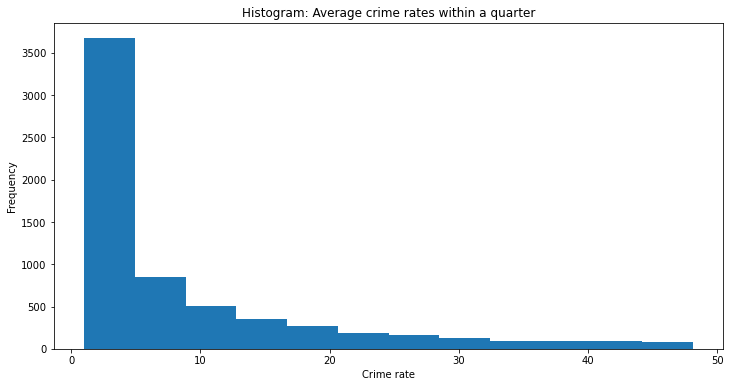

In [44]:
#histogram -Average crimes rates within a quarter
fig, ax = plt.subplots(figsize = (12,6))

ax.hist(crime_DF_final["average_incident"], bins=12)
ax.set_title("Histogram: Average crime rates within a quarter")
ax.set_xlabel("Crime rate")
ax.set_ylabel("Frequency")

plt.savefig('01_Outputs/Hist_avg_crimerate.png')
plt.show()

In [42]:
#bar plot - TYPES oF CRIME
#Find the mean of the incidents recorded
Crimetypesgroup = crime_DF_final.groupby(['crime_name'])
crimetypesaverage = Crimetypesgroup['average_incident'].mean()
crimetypesavgDF = pd.DataFrame(crimetypesaverage)

crimetypesavgDFsort = crimetypesavgDF.sort_values(by="average_incident", ascending=False) 

crimetypesavgDFsort

,average_incident
crime_name,
Burglary/Break and enter,19.971420
Property damage,19.220647
Assault and related offences,17.936164
Theft,17.047191
Breaches of orders,15.131192
Deception,14.640913
Miscellaneous offences,14.059474
Drug use and possession,11.450186
Disorderly and offensive conduct,9.584186


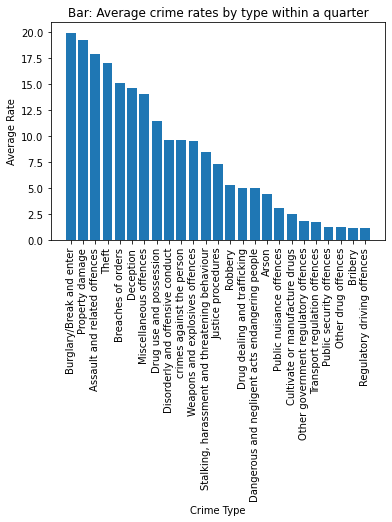

In [45]:
plt.bar(crimetypesavgDFsort.index, crimetypesavgDFsort["average_incident"])
plt.xticks(rotation=90)

plt.title("Bar: Average crime rates by type within a quarter")
plt.xlabel('Crime Type')  
plt.ylabel('Average Rate')
#plt.savefig('../Visualizations/Lat_vs_Temp.png')


plt.savefig('01_Outputs/Bar_avg_crimerate_type.png')
plt.show()